In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('jew_necklaces.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imageSkeleton Hands Neckla...",EditSell SimilarExclude listing,$15.29Fixed price,$0.00100% Free shipping,1,$15.29,–,"Mar 18, 2024"
1,1,", preview full size imageHello Kitty Cat Gold ...",EditSell SimilarExclude listing,$10.00Fixed price,$0.500% Free shipping,1,$10.00,–,"Mar 18, 2024"
2,2,", preview full size imageSkelton skull Necklac...",EditSell SimilarExclude listing,$7.00Fixed price,$0.00100% Free shipping,2,$14.00,–,"Mar 18, 2024"
3,3,", preview full size imageNew Fashion Stainless...",EditSell SimilarExclude listing,$5.49Fixed price,$0.00100% Free shipping,1,$5.49,–,"Mar 15, 2024"
4,4,", preview full size imageHard Jewlery Mini Cub...",EditSell SimilarExclude listing,$19.00Fixed price,$4.360% Free shipping,1,$19.00,–,"Mar 14, 2024"
...,...,...,...,...,...,...,...,...,...
595,45,", preview full size imageGorgeous Silver Zirco...",EditExclude listing,$1.76Fixed price,$2.5671% Free shipping,36,$63.34,–,"Nov 30, 2021"
596,46,", preview full size imageWomen Bohemia Sea Con...",EditExclude listing,$6.45Fixed price,$0.00100% Free shipping,1,$6.45,–,"Nov 29, 2021"
597,47,", preview full size imageLeo astrology lion je...",EditExclude listing,$5.50Auction,$5.850% Free shipping,1,$5.50,3,"Nov 26, 2021"
598,48,", preview full size imageLink Chain Choker Nec...",EditExclude listing,$4.28Fixed price,$6.080% Free shipping,2,$8.56,–,"Nov 24, 2021"


In [3]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)

data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)

data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl..."
1,Hello Kitty Cat Gold Pendant Necklace in Cubic...,10.00,10.00,1.0,2024-03-18,0.50,"[Hello, Kitty, Cat, Gold, Pendant, Necklace, C..."
2,Skelton skull Necklace metal alloy Emo Hallowe...,7.00,14.00,2.0,2024-03-18,0.00,"[Skelton, skull, Necklace, metal, alloy, Emo, ..."
3,New Fashion Stainless Steel Magic Witch Neckla...,5.49,5.49,1.0,2024-03-15,0.00,"[New, Fashion, Stainless, Steel, Magic, Witch,..."
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler..."
...,...,...,...,...,...,...,...
595,Gorgeous Silver Zircon Necklace Pendant Women ...,1.76,63.34,36.0,2021-11-30,0.57,"[Gorgeous, Silver, Zircon, Necklace, Pendant, ..."
596,Women Bohemia Sea Conch Shell Pendant Choker H...,6.45,6.45,1.0,2021-11-29,0.00,"[Women, Bohemia, Sea, Conch, Shell, Pendant, C..."
597,Leo astrology lion jewlery lot Leo astrology l...,5.50,5.50,1.0,2021-11-26,0.85,"[Leo, astrology, lion, jewlery, lot, Leo, astr..."
598,Link Chain Choker Necklace Punk Multilayer Pad...,4.28,8.56,2.0,2021-11-24,0.08,"[Link, Chain, Choker, Necklace, Punk, Multilay..."


# Trends

In [5]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
November 2021,7.858333,86.0,208.05,6,2021-11-01
December 2021,9.965000,56.0,643.80,20,2021-12-01
January 2022,9.617879,107.0,846.55,33,2022-01-01
February 2022,19.831667,95.0,617.74,24,2022-02-01
March 2022,13.934737,24.0,335.32,19,2022-03-01
April 2022,8.711111,27.0,193.46,18,2022-04-01
May 2022,27.716364,1747.0,7306.90,22,2022-05-01
June 2022,20.513333,24.0,454.89,21,2022-06-01
July 2022,12.688750,38.0,353.60,24,2022-07-01


In [6]:
from matplotlib import pyplot as plt

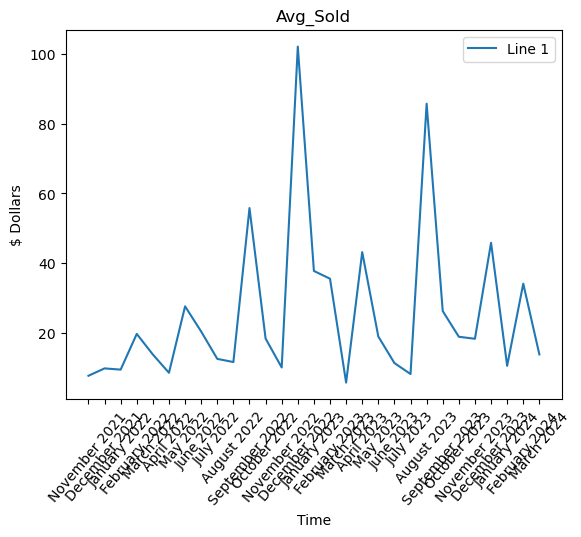

In [7]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [12]:
trend_df.sort_values(by='Avg_Sold', ascending=False).head()

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
December 2022,102.015789,83.0,2629.19,19,2022-12-01
August 2023,85.685238,63.0,2024.17,21,2023-08-01
September 2022,55.828889,21.0,1029.40,18,2022-09-01
December 2023,45.884815,32.0,1853.36,27,2023-12-01
April 2023,43.220769,28.0,1137.33,26,2023-04-01


In [15]:
data_df.loc[data_df['Month_Year'] == 'December 2022'].sort_values(by='Avg_Sold_Price', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
317,Jewlery Gold ChainJewlery Gold Chain,1700.00,1700.00,1.0,2022-12-29,0.90,"[Jewlery, Gold, ChainJewlery, Gold, Chain]",December 2022
320,Vintage Chico's Statement Large Long Three Pen...,45.00,45.00,1.0,2022-12-27,0.85,"[Vintage, Chico, Statement, Large, Long, Three...",December 2022
319,Indian Pearl Gold Tone Multi Stone AD Necklace...,28.86,28.86,1.0,2022-12-27,0.00,"[Indian, Pearl, Gold, Tone, Multi, Stone, AD, ...",December 2022
330,Anne Klein Smart Jewlery Hidden 4Gb Usb Flash ...,28.00,28.00,1.0,2022-12-03,0.69,"[Anne, Klein, Smart, Jewlery, Hidden, Usb, Fla...",December 2022
329,Photo Projection Necklace For Women Jewlery Pe...,26.89,564.79,21.0,2022-12-08,0.00,"[Photo, Projection, Necklace, Women, Jewlery, ...",December 2022
331,Necklace Trio Penguin Seahorse Silver Blue Whi...,20.00,20.00,1.0,2022-12-02,0.00,"[Necklace, Trio, Penguin, Seahorse, Silver, Bl...",December 2022
334,Tactical Shotgun Charm Pendant Silver Plated N...,14.40,28.80,2.0,2022-12-01,0.01,"[Tactical, Shotgun, Charm, Pendant, Silver, Ne...",December 2022
318,Silver Dinosaur Pendant Necklace in Brand New ...,11.99,11.99,1.0,2022-12-28,0.00,"[Silver, Dinosaur, Pendant, Necklace, Brand, N...",December 2022
332,Ladybug Dragon Girl Necklace Comic Black Rope ...,10.66,53.29,5.0,2022-12-02,0.50,"[Ladybug, Dragon, Girl, Necklace, Comic, Black...",December 2022
327,Round Necklace 2 Carat Brilliant Cut Solitair...,9.90,9.90,1.0,2022-12-10,0.00,"[Round, Necklace, Carat, Brilliant, Cut, Solit...",December 2022


In [17]:
data_df.drop(317, inplace=True)

In [18]:
data_df.loc[data_df['Month_Year'] == 'August 2023'].sort_values(by='Avg_Sold_Price', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
143,JewleryJewlery,1500.00,1500.00,1.0,2023-08-20,0.00,[JewleryJewlery],August 2023
140,Vintage .925 Sterling Silver Cross Pendant Jew...,75.00,75.00,1.0,2023-08-24,0.00,"[Vintage, Sterling, Silver, Cross, Pendant, Je...",August 2023
147,Wholesale Pendent Lots mix gemstone .925 sterl...,40.94,163.76,4.0,2023-08-14,0.00,"[Wholesale, Pendent, Lots, gemstone, .925, ste...",August 2023
136,Swarovski Necklace Honey Crystal Princess Cut ...,27.99,27.99,1.0,2023-08-31,0.25,"[Swarovski, Necklace, Honey, Crystal, Princess...",August 2023
145,RAE DUNN - BONES PET JEWLERY - ONE FOR YOU & O...,26.99,26.99,1.0,2023-08-17,0.50,"[RAE, DUNN, BONES, PET, JEWLERY, FOR, YOU, ONE...",August 2023
146,Anne Klein Smart Jewlery 4Gb Usb Flash Drive L...,19.99,19.99,1.0,2023-08-14,0.41,"[Anne, Klein, Smart, Jewlery, Usb, Flash, Driv...",August 2023
150,Plunder Design Necklace Earrings and Bracelet ...,18.00,18.00,1.0,2023-08-09,0.25,"[Plunder, Design, Necklace, Earrings, Bracelet...",August 2023
139,Vintage J J Jewlery BIG FROG STATEMENT NECKLA...,15.00,15.00,1.0,2023-08-25,0.65,"[Vintage, J, J, Jewlery, BIG, FROG, STATEMENT,...",August 2023
144,Heart Shape Stone Necklace Gemstone Handmade F...,13.00,13.00,1.0,2023-08-18,0.05,"[Heart, Shape, Stone, Necklace, Gemstone, Hand...",August 2023
151,Egyptian Inspired Costume Jewlery. Necklace 18...,12.60,12.60,1.0,2023-08-08,0.70,"[Egyptian, Inspired, Costume, Jewlery, Necklac...",August 2023


In [19]:
data_df.drop(143, inplace=True)

In [20]:
data_df.loc[data_df['Month_Year'] == 'September 2022'].sort_values(by='Avg_Sold_Price', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
392,Sekhmet Pendant Turquoise Egyptian Jewlery Gol...,645.00,645.00,1.0,2022-09-03,0.00,"[Sekhmet, Pendant, Turquoise, Egyptian, Jewler...",September 2022
380,Jaxxon Mens Jewlery Cuban Link + Rope Chain St...,125.50,125.50,1.0,2022-09-25,0.50,"[Jaxxon, Mens, Jewlery, Cuban, Link, +, Rope, ...",September 2022
393,SWAROVSKI WOMANS JEWLERY SETSWAROVSKI WOMANS J...,50.00,50.00,1.0,2022-09-03,0.00,"[SWAROVSKI, WOMANS, JEWLERY, SETSWAROVSKI, WOM...",September 2022
379,new with tags Brighton jewlery earring necklac...,27.02,27.02,1.0,2022-09-26,0.50,"[new, tags, Brighton, jewlery, necklace, flowe...",September 2022
377,Hot Topic Box Lunch Jewlery Lot Sailor Moon Ki...,24.99,24.99,1.0,2022-09-29,0.99,"[Hot, Topic, Box, Lunch, Jewlery, Lot, Sailor,...",September 2022
388,SISMIURRA Jewlery 925 Sterling Silver Music No...,16.99,16.99,1.0,2022-09-08,0.00,"[SISMIURRA, Jewlery, Sterling, Silver, Music, ...",September 2022
394,jewlery snake necklessjewlery snake neckless,15.00,15.00,1.0,2022-09-01,0.00,"[jewlery, necklessjewlery, snake, neckless]",September 2022
378,Fashion Jewlery Earings Black White Cats Moon ...,14.99,14.99,1.0,2022-09-28,0.00,"[Fashion, Jewlery, Earings, Black, White, Moon...",September 2022
390,Lot 10 vtg NECKLACE CLear Rhinestone diamond p...,14.80,14.80,1.0,2022-09-04,0.85,"[Lot, vtg, NECKLACE, CLear, Rhinestone, diamon...",September 2022
387,"Farm Tractor Necklace 16-36"" Truck Trailer Cha...",14.50,29.00,2.0,2022-09-12,0.99,"[Farm, Tractor, Necklace, 16-36, Truck, Traile...",September 2022


In [21]:
data_df.drop(392, inplace=True)

In [22]:
data_df.loc[data_df['Month_Year'] == 'December 2023'].sort_values(by='Avg_Sold_Price', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
97,Sekhmet Pendant Egyptian Jewlery goddess Gold ...,588.07,1176.14,2.0,2023-12-14,0.00,"[Sekhmet, Pendant, Egyptian, Jewlery, goddess,...",December 2023
86,Rocky Gorman JewleryRocky Gorman Jewlery,300.00,300.00,1.0,2023-12-25,0.75,"[Rocky, Gorman, JewleryRocky, Gorman, Jewlery]",December 2023
79,Inverted Pentagram Cross .925 Sterling Silver ...,75.00,75.00,1.0,2023-12-29,0.25,"[Pentagram, Cross, .925, Sterling, Silver, Occ...",December 2023
95,Jewlery mixed lot 14ksilverMonetNapierearrings...,72.00,72.00,1.0,2023-12-15,0.88,"[Jewlery, Jewlery, mixed, lot]",December 2023
100,Faith Cross 10K Gold Mother of Pearl Circle Pe...,25.00,25.00,1.0,2023-12-10,0.00,"[Faith, Cross, Gold, Mother, Pearl, Circle, Pe...",December 2023
80,KENDRA SCOTT SKYLIE GOLD ARROWHEAD PENDANT NEC...,20.00,20.00,1.0,2023-12-28,0.00,"[KENDRA, SCOTT, SKYLIE, GOLD, ARROWHEAD, PENDA...",December 2023
93,"24K Plated Gold Chain 16"" LJ24KGL Fashion Jewl...",16.00,16.00,1.0,2023-12-18,0.05,"[Plated, Gold, Chain, LJ24KGL, Fashion, Jewler...",December 2023
85,Black Obsidian Pendant Carved Dragon Turtle Me...,13.93,27.85,2.0,2023-12-25,0.00,"[Black, Obsidian, Pendant, Carved, Dragon, Tur...",December 2023
91,Mudd Stretch Bracelet Fashion Jewlery with Tag...,12.00,12.00,1.0,2023-12-19,0.00,"[Mudd, Stretch, Bracelet, Fashion, Jewlery, Ta...",December 2023
94,Taylor Swift Inspired Jewlery Mirrorball and G...,11.00,11.00,1.0,2023-12-16,0.64,"[Taylor, Swift, Inspired, Jewlery, Mirrorball,...",December 2023


In [23]:
data_df.drop([97, 86], inplace=True)

In [24]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
November 2021,7.858333,86.0,208.05,6,2021-11-01
December 2021,9.965000,56.0,643.80,20,2021-12-01
January 2022,9.617879,107.0,846.55,33,2022-01-01
February 2022,19.831667,95.0,617.74,24,2022-02-01
March 2022,13.934737,24.0,335.32,19,2022-03-01
April 2022,8.711111,27.0,193.46,18,2022-04-01
May 2022,27.716364,1747.0,7306.90,22,2022-05-01
June 2022,20.513333,24.0,454.89,21,2022-06-01
July 2022,12.688750,38.0,353.60,24,2022-07-01


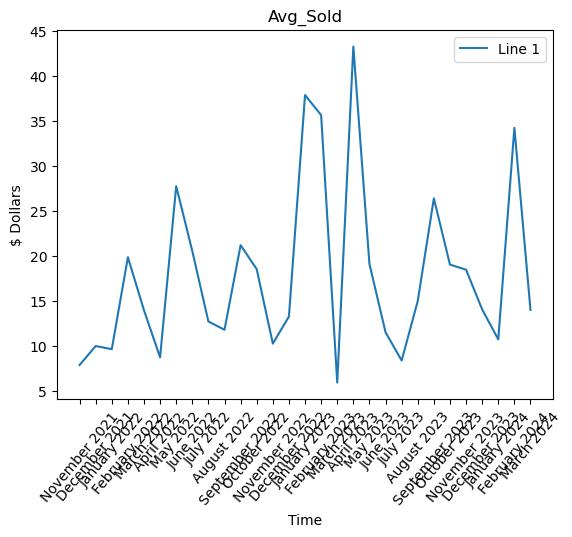

In [25]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [27]:
trend_df.sort_values(by='Total_Sales', ascending=False).head()

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
May 2022,27.716364,1747.0,7306.90,22,2022-05-01
February 2024,34.203056,321.0,4592.98,36,2024-02-01
March 2024,13.971667,226.0,2164.70,18,2024-03-01
April 2023,43.220769,28.0,1137.33,26,2023-04-01
February 2023,35.613929,36.0,1030.52,28,2023-02-01


In [29]:
data_df.loc[data_df['Month_Year'] == 'May 2022'].sort_values(by='Total_Sales', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
463,Gorgeous 925 Silver Necklace Pendant Women Whi...,3.89,6552.96,1685.0,2022-05-20,3.25,"[Gorgeous, Silver, Necklace, Pendant, Women, W...",May 2022
479,.925 BEAUTIFUL MULTIPLE PIECES OF STERLING SIL...,280.00,280.00,1.0,2022-05-01,0.95,"[BEAUTIFUL, MULTIPLE, PIECES, OF, STERLING, SI...",May 2022
471,Kendra Scott Lot JewleryKendra Scott Lot Jewlery,75.00,75.00,1.0,2022-05-10,0.00,"[Kendra, Scott, Lot, JewleryKendra, Scott, Lot...",May 2022
460,Chloe & Isabel Jewlery Necklace (new) SUNLIT S...,57.00,57.00,1.0,2022-05-25,0.15,"[Chloe, Isabel, Jewlery, Necklace, new, SUNLIT...",May 2022
474,Kendra Scott Adjustable Vintage Gold Color Bar...,26.50,52.99,2.0,2022-05-09,0.80,"[Kendra, Scott, Adjustable, Vintage, Gold, Col...",May 2022
478,Caduceus Mercury Hermes Bronze Pendant Pre med...,9.73,48.66,5.0,2022-05-02,0.00,"[Caduceus, Mercury, Hermes, Bronze, Pendant, P...",May 2022
470,ESTATE JEWLERY: Signed EUGENE Four Strand Bead...,47.00,47.00,1.0,2022-05-12,0.47,"[ESTATE, JEWLERY, EUGENE, Four, Strand, Beaded...",May 2022
473,Women Fashion Titanium Stainless Steel Sea Tur...,2.56,38.35,15.0,2022-05-10,0.00,"[Women, Fashion, Titanium, Stainless, Steel, S...",May 2022
465,PANDORA JEWLERY NECKLACE 1/2” HEART STERLING ....,29.99,29.99,1.0,2022-05-16,0.00,"[PANDORA, JEWLERY, NECKLACE, ”, HEART, STERLIN...",May 2022
468,Indian Pearl Gold Plated Sapphire Stone AD Nec...,23.98,23.98,1.0,2022-05-14,0.00,"[Indian, Pearl, Gold, Plated, Sapphire, Stone,...",May 2022


In [30]:
data_df.drop([463], inplace=True)

In [31]:
data_df.loc[data_df['Month_Year'] == 'February 2024'].sort_values(by='Total_Sales', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
22,Lab Created AAA CZ Necklace 2 Carat Brilliant ...,12.64,2855.92,226.0,2024-02-26,3.69,"[Lab, Created, AAA, CZ, Necklace, Carat, Brill...",February 2024
27,NightRider Fleur de lies Silver 925 USA Night ...,329.00,329.00,1.0,2024-02-25,0.80,"[NightRider, Fleur, Silver, USA, Night, Rider,...",February 2024
33,ALEXANDER MCQUEEN silver chain multi heart har...,250.00,250.00,1.0,2024-02-21,0.00,"[ALEXANDER, MCQUEEN, silver, chain, multi, hea...",February 2024
31,Lab Created AAA CZ Necklace 2 Carat Brilliant ...,11.21,246.71,22.0,2024-02-22,0.00,"[Lab, Created, AAA, CZ, Necklace, Carat, Brill...",February 2024
26,RARE OPAL SETTING IN 14K GOLD UNIQUE PENDANT ...,180.00,180.00,1.0,2024-02-26,0.36,"[RARE, OPAL, SETTING, IN, GOLD, UNIQUE, PENDAN...",February 2024
19,Moon & Tree Glow In The Dark Necklace light wi...,10.79,140.32,13.0,2024-02-29,0.00,"[Moon, Tree, Glow, Dark, Necklace, jewlery, JL...",February 2024
52,womens jewlery/ opal necklacewomens jewlery/ o...,120.00,120.00,1.0,2024-02-02,0.96,"[womens, opal, necklacewomens, jewlery/, opal,...",February 2024
21,Ladybug Miraculous Dragon Girl Choker Necklace...,12.99,64.95,5.0,2024-02-28,0.00,"[Ladybug, Miraculous, Dragon, Girl, Choker, Ne...",February 2024
28,Chanel Refurbished Button Necklace Costume Jew...,52.00,52.00,1.0,2024-02-24,0.10,"[Chanel, Refurbished, Button, Necklace, Costum...",February 2024
51,Reserved Jewlery Reserved Jewlery,51.25,51.25,1.0,2024-02-03,0.00,"[Jewlery, Jewlery]",February 2024


In [32]:
data_df.drop([22], inplace=True)

In [35]:
data_df.loc[data_df['Month_Year'] == 'March 2024'].sort_values(by='Total_Sales', ascending=False)

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
14,Lord of The Rings Jewelry Arwen's Necklace LOT...,9.91,1783.00,180.0,2024-03-05,3.84,"[Lord, Rings, Jewelry, Arwen, Necklace, LOTR, ...",March 2024
5,Hot Double Layers Leather Choker Jewlery Leath...,3.08,83.25,27.0,2024-03-13,0.00,"[Hot, Double, Layers, Leather, Choker, Jewlery...",March 2024
10,Dance Necklace Dancer Gift Ballerina Jewlery S...,26.95,53.90,2.0,2024-03-05,0.95,"[Dance, Necklace, Dancer, Gift, Ballerina, Jew...",March 2024
9,INVICTA RESERVE 925 MEN'S JEWLERY BEAD/SKULL A...,26.00,52.00,2.0,2024-03-06,0.00,"[INVICTA, RESERVE, MEN, JEWLERY, BEAD/SKULL, A...",March 2024
6,Premier Designs Jewlery Spring Break Colorful ...,29.00,29.00,1.0,2024-03-11,0.80,"[Premier, Designs, Jewlery, Spring, Break, Col...",March 2024
12,Guess Necklace Cross Pendant JewleryGuess Neck...,25.00,25.00,1.0,2024-03-05,0.00,"[Guess, Necklace, Cross, Pendant, JewleryGuess...",March 2024
15,Kendra Scott Jewlery BlackKendra Scott Jewlery...,20.00,20.00,1.0,2024-03-04,0.00,"[Kendra, Scott, Jewlery, BlackKendra, Scott, J...",March 2024
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler...",March 2024
17,"Brighton Necklace Silver Plated "" Live Laugh L...",18.40,18.40,1.0,2024-03-01,0.45,"[Brighton, Necklace, Silver, Live, Laugh, Love...",March 2024
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl...",March 2024


In [36]:
data_df.drop([14], inplace=True)

In [37]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
November 2021,7.858333,86.0,208.05,6,2021-11-01
December 2021,9.965000,56.0,643.80,20,2021-12-01
January 2022,9.617879,107.0,846.55,33,2022-01-01
February 2022,19.831667,95.0,617.74,24,2022-02-01
March 2022,13.934737,24.0,335.32,19,2022-03-01
April 2022,8.711111,27.0,193.46,18,2022-04-01
May 2022,28.850952,62.0,753.94,21,2022-05-01
June 2022,20.513333,24.0,454.89,21,2022-06-01
July 2022,12.688750,38.0,353.60,24,2022-07-01


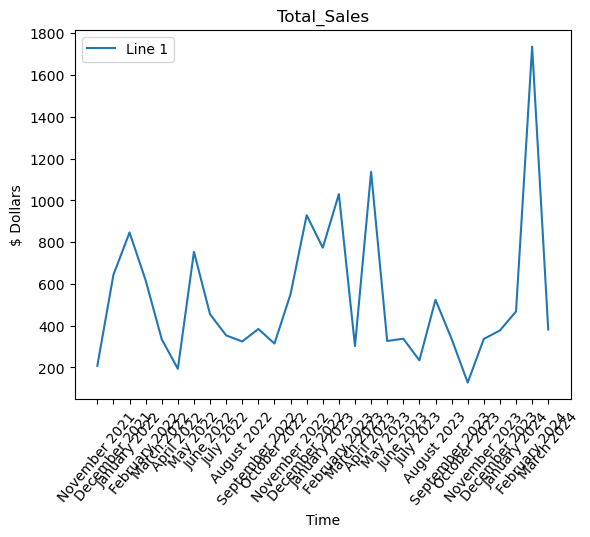

In [38]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

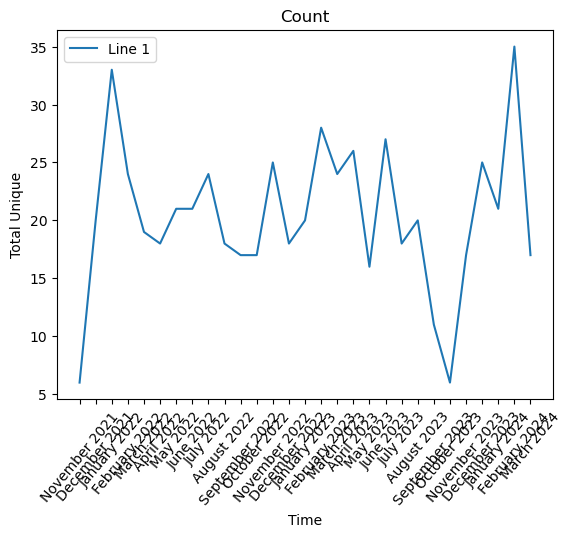

In [39]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Total Unique')
plt.title('Count')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Popular

In [40]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 10]
filtered_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl...",March 2024
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler...",March 2024
6,Premier Designs Jewlery Spring Break Colorful ...,29.00,29.00,1.0,2024-03-11,0.80,"[Premier, Designs, Jewlery, Spring, Break, Col...",March 2024
9,INVICTA RESERVE 925 MEN'S JEWLERY BEAD/SKULL A...,26.00,52.00,2.0,2024-03-06,0.00,"[INVICTA, RESERVE, MEN, JEWLERY, BEAD/SKULL, A...",March 2024
10,Dance Necklace Dancer Gift Ballerina Jewlery S...,26.95,53.90,2.0,2024-03-05,0.95,"[Dance, Necklace, Dancer, Gift, Ballerina, Jew...",March 2024
...,...,...,...,...,...,...,...,...
587,Photo Projection Necklace For Women Jewlery Pe...,18.99,56.97,3.0,2021-12-11,0.00,"[Photo, Projection, Necklace, Women, Jewlery, ...",December 2021
591,Natalie B Jewlery Vintage Inspired Turquiose N...,12.00,12.00,1.0,2021-12-04,0.65,"[Natalie, B, Jewlery, Vintage, Inspired, Turqu...",December 2021
592,NWT Fashion Jewlery Full Of Stones Necklace Ea...,34.00,34.00,1.0,2021-12-03,0.00,"[NWT, Fashion, Jewlery, Full, Stones, Necklace...",December 2021
593,Goth Heart Necklace For Women Stainless Steel ...,10.99,10.99,1.0,2021-12-01,0.00,"[Goth, Heart, Necklace, Women, Stainless, Stee...",December 2021


In [41]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [42]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Fashion Jewlery,30
1,Costume Jewlery,27
2,Pendant Necklace,24
3,Jewlery Pendant,22
4,Necklace For,22
5,Necklace For Women,22
6,For Women,22
7,Sterling Silver,20
8,Projection Necklace,18
9,Projection Necklace For,18


In [43]:
type_product = most_common_phrases_df['Name'].head(50).tolist()
type_product

['Fashion Jewlery',
 'Costume Jewlery',
 'Pendant Necklace',
 'Jewlery Pendant',
 'Necklace For',
 'Necklace For Women',
 'For Women',
 'Sterling Silver',
 'Projection Necklace',
 'Projection Necklace For',
 'Projection Necklace For Women',
 'Projection Necklace For Women Jewlery',
 'Necklace For Women Jewlery',
 'Necklace For Women Jewlery Pendant',
 'For Women Jewlery',
 'For Women Jewlery Pendant',
 'For Women Jewlery Pendant With',
 'Women Jewlery',
 'Women Jewlery Pendant',
 'Women Jewlery Pendant With',
 'Women Jewlery Pendant With Personalized',
 'Jewlery Pendant With',
 'Jewlery Pendant With Personalized',
 'Pendant With',
 'Pendant With Personalized',
 'With Personalized',
 'Jewlery Necklace',
 'Pendant Jewlery',
 'Kendra Scott',
 'Sterling Silver Necklace',
 'Silver Necklace',
 'Jewlery Lot',
 'Scott Jewlery',
 'Brand New',
 'Gold Tone',
 'Photo Projection',
 'Photo Projection Necklace',
 'Photo Projection Necklace For',
 'Photo Projection Necklace For Women',
 'Choker Neckla

In [44]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [45]:

dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': [], 'Count_Unique': []}


In [46]:
dict_sales

{'Phrase': [],
 'Avg_Sold_Price_mean': [],
 'Avg_Sold_Price_25': [],
 'Avg_Sold_Price_75': [],
 'Total_Sold': [],
 'Ship_Cost': [],
 'Count_Unique': []}

In [47]:


for phrase in type_product:
    # Filter rows where 'filtered_df' or 'Vitamin' is in the list
    temp_df = filtered_df[filtered_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    total = temp_df['Total_Sold'].sum()

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    count =  temp_df.describe()['Total_Sold'].tolist()[0]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(total)
    dict_sales['Ship_Cost'].append(ship)
    dict_sales['Count_Unique'].append(count)
    
stats_df = pd.DataFrame.from_dict(dict_sales)

stats_df['Ratio_Sold_Count'] = stats_df['Total_Sold'] / stats_df['Count_Unique']

In [48]:
stats_df.sort_values(by='Avg_Sold_Price_mean', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
31,Jewlery Lot,122.880000,19.7475,72.4925,6.0,0.250,6.0,1.000000
42,Jewlery with,68.725000,12.6750,100.0000,4.0,0.075,4.0,1.000000
32,Scott Jewlery,60.096000,32.9900,79.9900,5.0,0.000,5.0,1.000000
28,Kendra Scott,59.481250,31.3675,76.2475,9.0,0.000,8.0,1.125000
3,Jewlery Pendant,52.422000,18.9900,25.2900,65.0,0.000,10.0,6.500000
7,Sterling Silver,39.028182,16.3900,65.0000,14.0,0.000,11.0,1.272727
27,Pendant Jewlery,32.998750,15.0000,37.5000,15.0,0.125,8.0,1.875000
1,Costume Jewlery,30.595000,12.1500,22.6250,18.0,0.250,18.0,1.000000
33,Brand New,30.594000,11.9900,27.0000,5.0,0.000,5.0,1.000000
26,Jewlery Necklace,27.904615,20.0000,37.0000,13.0,0.000,13.0,1.000000


In [49]:
stats_df.sort_values(by='Total_Sold', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
4,Necklace For,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
5,Necklace For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
6,For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
3,Jewlery Pendant,52.422000,18.990,25.29,65.0,0.0,10.0,6.500000
25,With Personalized,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
15,For Women Jewlery Pendant,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
24,Pendant With Personalized,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
23,Pendant With,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
22,Jewlery Pendant With Personalized,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
21,Jewlery Pendant With,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111


In [50]:
stats_df.sort_values(by='Ratio_Sold_Count', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
25,With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
14,For Women Jewlery,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
37,Photo Projection Necklace For,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
38,Photo Projection Necklace For Women,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
24,Pendant With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
23,Pendant With,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
22,Jewlery Pendant With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
21,Jewlery Pendant With,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
20,Women Jewlery Pendant With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
19,Women Jewlery Pendant With,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111


# Time Series

In [54]:
data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl...",March 2024
1,Hello Kitty Cat Gold Pendant Necklace in Cubic...,10.00,10.00,1.0,2024-03-18,0.50,"[Hello, Kitty, Cat, Gold, Pendant, Necklace, C...",March 2024
2,Skelton skull Necklace metal alloy Emo Hallowe...,7.00,14.00,2.0,2024-03-18,0.00,"[Skelton, skull, Necklace, metal, alloy, Emo, ...",March 2024
3,New Fashion Stainless Steel Magic Witch Neckla...,5.49,5.49,1.0,2024-03-15,0.00,"[New, Fashion, Stainless, Steel, Magic, Witch,...",March 2024
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler...",March 2024
...,...,...,...,...,...,...,...,...
595,Gorgeous Silver Zircon Necklace Pendant Women ...,1.76,63.34,36.0,2021-11-30,0.57,"[Gorgeous, Silver, Zircon, Necklace, Pendant, ...",November 2021
596,Women Bohemia Sea Conch Shell Pendant Choker H...,6.45,6.45,1.0,2021-11-29,0.00,"[Women, Bohemia, Sea, Conch, Shell, Pendant, C...",November 2021
597,Leo astrology lion jewlery lot Leo astrology l...,5.50,5.50,1.0,2021-11-26,0.85,"[Leo, astrology, lion, jewlery, lot, Leo, astr...",November 2021
598,Link Chain Choker Necklace Punk Multilayer Pad...,4.28,8.56,2.0,2021-11-24,0.08,"[Link, Chain, Choker, Necklace, Punk, Multilay...",November 2021


In [61]:
trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
November 2021,7.858333,86.0,208.05,6,2021-11-01
December 2021,9.965000,56.0,643.80,20,2021-12-01
January 2022,9.617879,107.0,846.55,33,2022-01-01
February 2022,19.831667,95.0,617.74,24,2022-02-01
March 2022,13.934737,24.0,335.32,19,2022-03-01
April 2022,8.711111,27.0,193.46,18,2022-04-01
May 2022,28.850952,62.0,753.94,21,2022-05-01
June 2022,20.513333,24.0,454.89,21,2022-06-01
July 2022,12.688750,38.0,353.60,24,2022-07-01


In [62]:
trend_df = trend_df.rename(columns={'Date': 'DATE'})

In [51]:
from sklearn.linear_model import LinearRegression
import os
from sklearn.metrics import r2_score
import statistics as stat
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
from matplotlib.pyplot import subplots
import statsmodels.formula.api as smf 
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
import math
import statsmodels.api as smf_non

In [63]:
pd.read_csv(f'Economic_data/{econ}.csv')

,DATE,PCE
0,1959-01-01,306.1
1,1959-02-01,309.6
2,1959-03-01,312.7
3,1959-04-01,312.2
4,1959-05-01,316.1
...,...,...
777,2023-10-01,18826.8
778,2023-11-01,18903.0
779,2023-12-01,19013.7
780,2024-01-01,19043.6


In [65]:
trend_df.dtypes

Avg_Sold              float64
Total_Sold            float64
Total_Sales           float64
Count                   int64
DATE           datetime64[ns]
dtype: object

In [100]:
econ_data = ['PCE', 'MEDCPIM158SFRBCLE', 'UNRATE-2', 'REAINTRATREARAT10Y', 'CORESTICKM159SFRBATL', 'M2REAL']

final_df = trend_df
for econ in econ_data:
    
    econ_df = pd.read_csv(f'Economic_data/{econ}.csv')
    
    econ_df['DATE'] = pd.to_datetime(econ_df['DATE'])
    
    final_df = pd.merge(econ_df, final_df, on='DATE')

In [101]:
final_df['M2REAL_Prev'] = final_df['M2REAL'].shift(1)
final_df['CORESTICKM159SFRBATL_Prev'] = final_df['CORESTICKM159SFRBATL'].shift(1)
final_df['REAINTRATREARAT10Y_Prev'] = final_df['REAINTRATREARAT10Y'].shift(1)
final_df['UNRATE_Prev'] = final_df['UNRATE'].shift(1)
final_df['MEDCPIM158SFRBCLE_Prev'] = final_df['MEDCPIM158SFRBCLE'].shift(1)
final_df['PCE_Prev'] = final_df['PCE'].shift(1)
final_df

,DATE,M2REAL,CORESTICKM159SFRBATL,REAINTRATREARAT10Y,UNRATE,MEDCPIM158SFRBCLE,PCE,Avg_Sold,Total_Sold,Total_Sales,Count,M2REAL_Prev,CORESTICKM159SFRBATL_Prev,REAINTRATREARAT10Y_Prev,UNRATE_Prev,MEDCPIM158SFRBCLE_Prev,PCE_Prev
0,2021-11-01,7645.1,3.184384,0.163998,4.1,5.921978,16741.6,7.858333,86.0,208.05,6,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-01,7654.7,3.456458,0.091689,3.9,4.864243,16799.2,9.965000,56.0,643.80,20,7645.1,3.184384,0.163998,4.1,5.921978,16741.6
2,2022-01-01,7632.1,3.965498,0.319495,4.0,6.735986,16888.6,9.617879,107.0,846.55,33,7654.7,3.456458,0.091689,3.9,4.864243,16799.2
3,2022-02-01,7594.4,4.280304,0.441593,3.8,6.375188,16999.7,19.831667,95.0,617.74,24,7632.1,3.965498,0.319495,4.0,6.735986,16888.6
4,2022-03-01,7550.5,4.534344,0.347090,3.6,6.221319,17203.6,13.934737,24.0,335.32,19,7594.4,4.280304,0.441593,3.8,6.375188,16999.7
5,2022-04-01,7519.7,4.703935,0.949400,3.7,6.923883,17310.5,8.711111,27.0,193.46,18,7550.5,4.534344,0.347090,3.6,6.221319,17203.6
6,2022-05-01,7443.8,4.950974,1.203898,3.6,7.588879,17384.8,28.850952,62.0,753.94,21,7519.7,4.703935,0.949400,3.7,6.923883,17310.5
7,2022-06-01,7337.2,5.396330,1.025094,3.6,8.010460,17550.0,20.513333,24.0,454.89,21,7443.8,4.950974,1.203898,3.6,7.588879,17384.8
8,2022-07-01,7336.5,5.590730,1.062175,3.5,5.988326,17556.4,12.688750,38.0,353.60,24,7337.2,5.396330,1.025094,3.6,8.010460,17550.0
9,2022-08-01,7325.1,5.951312,0.855625,3.6,8.048036,17692.2,11.777222,37.0,324.50,18,7336.5,5.590730,1.062175,3.5,5.988326,17556.4


# Economic Data

## M2REAL

<AxesSubplot:>

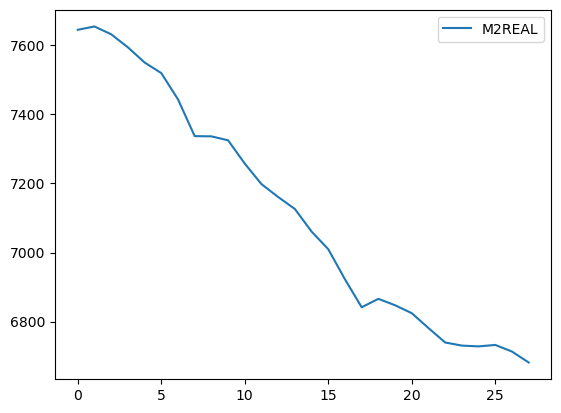

In [102]:
final_df.plot(y='M2REAL')

In [103]:
final_df['Prev_M2REAL_Prev'] = final_df['M2REAL_Prev'].shift(1)
final_df['change_M2REAL_Prev'] = final_df['M2REAL_Prev'] - final_df['Prev_M2REAL_Prev']


mod1 = smf.ols(f'change_M2REAL_Prev ~ final_df.index + Prev_M2REAL_Prev', data = final_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:     change_M2REAL_Prev   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.6749
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.519
Time:                        11:17:38   Log-Likelihood:                -125.96
No. Observations:                  26   AIC:                             257.9
Df Residuals:                      23   BIC:                             261.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          577.3075   1078.994  

<AxesSubplot:>

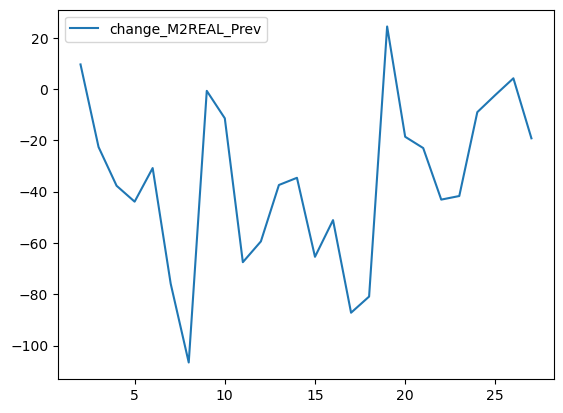

In [104]:
final_df.plot(y='change_M2REAL_Prev')

In [105]:
final_df['Prev_change_M2REAL_Prev'] = final_df['change_M2REAL_Prev'].shift(1)
final_df['change_change_Prev_M2REAL_Prev'] = final_df['change_M2REAL_Prev'] - final_df['Prev_change_M2REAL_Prev']


mod1 = smf.ols(f'change_change_Prev_M2REAL_Prev ~ Prev_change_M2REAL_Prev', data = final_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     change_change_Prev_M2REAL_Prev   R-squared:                       0.397
Model:                                        OLS   Adj. R-squared:                  0.370
Method:                             Least Squares   F-statistic:                     15.12
Date:                            Tue, 15 Oct 2024   Prob (F-statistic):           0.000741
Time:                                    11:17:50   Log-Likelihood:                -120.41
No. Observations:                              25   AIC:                             244.8
Df Residuals:                                  23   BIC:                             247.3
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975

## CORESTICKM159SFRBATL

<AxesSubplot:>

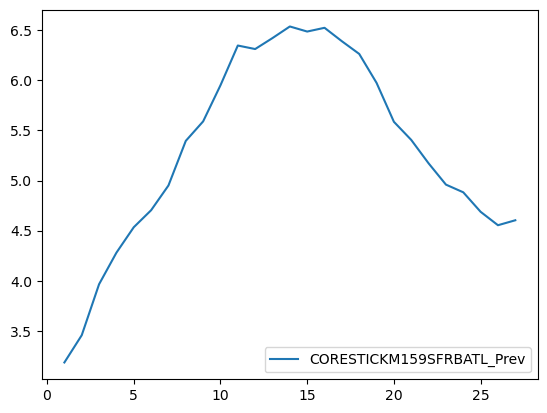

In [106]:
final_df.plot(y='CORESTICKM159SFRBATL_Prev')

In [107]:
final_df['Prev_CORESTICKM159SFRBATL_Prev'] = final_df['CORESTICKM159SFRBATL_Prev'].shift(1)
final_df['change_CORESTICKM159SFRBATL_Prev'] = final_df['CORESTICKM159SFRBATL_Prev'] - final_df['Prev_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_CORESTICKM159SFRBATL_Prev ~ final_df.index + Prev_CORESTICKM159SFRBATL_Prev', data = final_df).fit() 
print(mod1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     change_CORESTICKM159SFRBATL_Prev   R-squared:                       0.678
Model:                                          OLS   Adj. R-squared:                  0.650
Method:                               Least Squares   F-statistic:                     24.18
Date:                              Tue, 15 Oct 2024   Prob (F-statistic):           2.22e-06
Time:                                      11:17:52   Log-Likelihood:                 14.666
No. Observations:                                26   AIC:                            -23.33
Df Residuals:                                    23   BIC:                            -19.56
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                     coef    std err          t      P

In [111]:
final_df['Prev_change_CORESTICKM159SFRBATL_Prev'] = final_df['change_CORESTICKM159SFRBATL_Prev'].shift(1)
final_df['change_change_CORESTICKM159SFRBATL_Prev'] = final_df['change_CORESTICKM159SFRBATL_Prev'] - final_df['Prev_change_CORESTICKM159SFRBATL_Prev']


mod1 = smf.ols(f'change_change_CORESTICKM159SFRBATL_Prev ~  final_df.index + Prev_change_CORESTICKM159SFRBATL_Prev', data = final_df).fit() 
print(mod1.summary())

                                       OLS Regression Results                                      
Dep. Variable:     change_change_CORESTICKM159SFRBATL_Prev   R-squared:                       0.281
Model:                                                 OLS   Adj. R-squared:                  0.216
Method:                                      Least Squares   F-statistic:                     4.300
Date:                                     Tue, 15 Oct 2024   Prob (F-statistic):             0.0265
Time:                                             11:19:27   Log-Likelihood:                 13.998
No. Observations:                                       25   AIC:                            -22.00
Df Residuals:                                           22   BIC:                            -18.34
Df Model:                                                2                                         
Covariance Type:                                 nonrobust                                         


Does not pass dickey fuller test

## REAINTRATREARAT10Y

<AxesSubplot:>

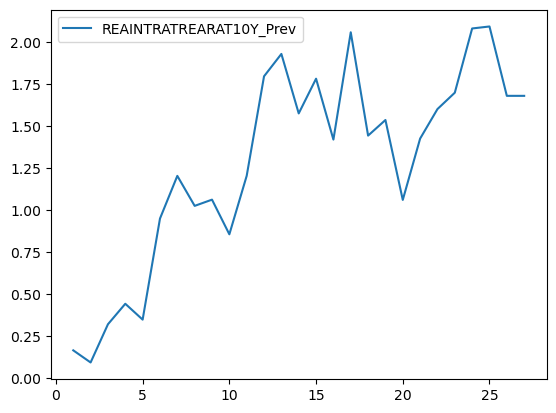

In [113]:
final_df.plot(y='REAINTRATREARAT10Y_Prev')

In [114]:
final_df['Prev_REAINTRATREARAT10Y_Prev'] = final_df['REAINTRATREARAT10Y_Prev'].shift(1)
final_df['change_REAINTRATREARAT10Y_Prev'] = final_df['REAINTRATREARAT10Y_Prev'] - final_df['Prev_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_REAINTRATREARAT10Y_Prev ~ final_df.index + Prev_REAINTRATREARAT10Y_Prev', data = final_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                  
Dep. Variable:     change_REAINTRATREARAT10Y_Prev   R-squared:                       0.237
Model:                                        OLS   Adj. R-squared:                  0.171
Method:                             Least Squares   F-statistic:                     3.579
Date:                            Tue, 15 Oct 2024   Prob (F-statistic):             0.0443
Time:                                    11:21:09   Log-Likelihood:                -4.4111
No. Observations:                              26   AIC:                             14.82
Df Residuals:                                  23   BIC:                             18.60
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

<AxesSubplot:>

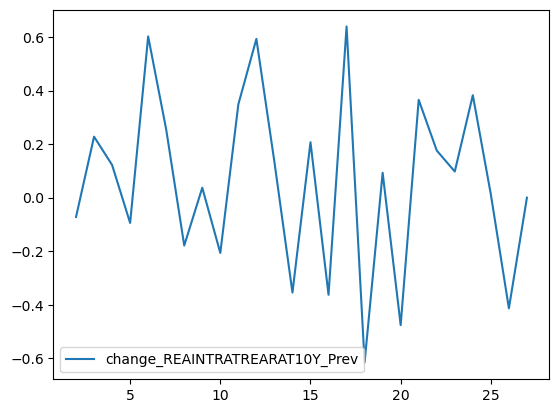

In [115]:
final_df.plot(y='change_REAINTRATREARAT10Y_Prev')

In [117]:
final_df['Prev_change_REAINTRATREARAT10Y_Prev'] = final_df['change_REAINTRATREARAT10Y_Prev'].shift(1)
final_df['change_change_REAINTRATREARAT10Y_Prev'] = final_df['change_REAINTRATREARAT10Y_Prev'] - final_df['Prev_change_REAINTRATREARAT10Y_Prev']


mod1 = smf.ols(f'change_change_REAINTRATREARAT10Y_Prev ~  0 + Prev_change_REAINTRATREARAT10Y_Prev', data = final_df).fit() 
print(mod1.summary())

                                          OLS Regression Results                                          
Dep. Variable:     change_change_REAINTRATREARAT10Y_Prev   R-squared (uncentered):                   0.626
Model:                                               OLS   Adj. R-squared (uncentered):              0.611
Method:                                    Least Squares   F-statistic:                              40.24
Date:                                   Tue, 15 Oct 2024   Prob (F-statistic):                    1.47e-06
Time:                                           11:22:10   Log-Likelihood:                         -7.6634
No. Observations:                                     25   AIC:                                      17.33
Df Residuals:                                         24   BIC:                                      18.55
Df Model:                                              1                                                  
Covariance Type:                     

## UNRATE

<AxesSubplot:>

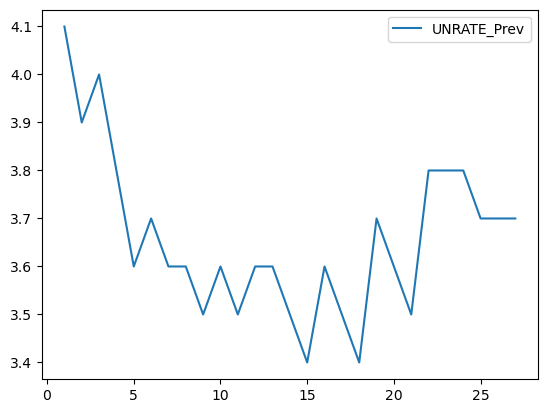

In [119]:
final_df.plot(y='UNRATE_Prev')

In [121]:
final_df['Prev_UNRATE_Prev'] = final_df['UNRATE_Prev'].shift(1)
final_df['change_UNRATE_Prev'] = final_df['UNRATE_Prev'] - final_df['Prev_UNRATE_Prev']


mod1 = smf.ols(f'change_UNRATE_Prev ~ Prev_UNRATE_Prev', data = final_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:     change_UNRATE_Prev   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     11.41
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00249
Time:                        11:23:36   Log-Likelihood:                 20.229
No. Observations:                  26   AIC:                            -36.46
Df Residuals:                      24   BIC:                            -33.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6422      0.491  

In [122]:
final_df['Prev_change_UNRATE_Prev'] = final_df['change_UNRATE_Prev'].shift(1)
final_df['change_change_UNRATE_Prev'] = final_df['change_UNRATE_Prev'] - final_df['Prev_change_UNRATE_Prev']


mod1 = smf.ols(f'change_change_UNRATE_Prev ~  0 + Prev_change_UNRATE_Prev', data = final_df).fit() 
print(mod1.summary())

                                    OLS Regression Results                                    
Dep. Variable:     change_change_UNRATE_Prev   R-squared (uncentered):                   0.688
Model:                                   OLS   Adj. R-squared (uncentered):              0.675
Method:                        Least Squares   F-statistic:                              52.97
Date:                       Tue, 15 Oct 2024   Prob (F-statistic):                    1.61e-07
Time:                               11:25:12   Log-Likelihood:                          16.640
No. Observations:                         25   AIC:                                     -31.28
Df Residuals:                             24   BIC:                                     -30.06
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
                              coef    std err     

## MEDCPIM158SFRBCLE

<AxesSubplot:>

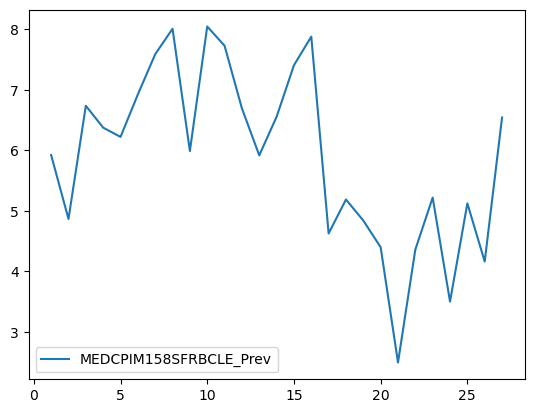

In [123]:
final_df.plot(y='MEDCPIM158SFRBCLE_Prev')

In [124]:
final_df['Prev_MEDCPIM158SFRBCLE_Prev'] = final_df['MEDCPIM158SFRBCLE_Prev'].shift(1)
final_df['change_MEDCPIM158SFRBCLE_Prev'] = final_df['MEDCPIM158SFRBCLE_Prev'] - final_df['Prev_MEDCPIM158SFRBCLE_Prev']


mod1 = smf.ols(f'change_MEDCPIM158SFRBCLE_Prev ~ Prev_MEDCPIM158SFRBCLE_Prev', data = final_df).fit() 
print(mod1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     change_MEDCPIM158SFRBCLE_Prev   R-squared:                       0.217
Model:                                       OLS   Adj. R-squared:                  0.184
Method:                            Least Squares   F-statistic:                     6.651
Date:                           Tue, 15 Oct 2024   Prob (F-statistic):             0.0165
Time:                                   11:26:10   Log-Likelihood:                -41.853
No. Observations:                             26   AIC:                             87.71
Df Residuals:                                 24   BIC:                             90.22
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----

In [125]:
final_df['Prev_change_MEDCPIM158SFRBCLE_Prev'] = final_df['change_MEDCPIM158SFRBCLE_Prev'].shift(1)
final_df['change_change_MEDCPIM158SFRBCLE_Prev'] = final_df['change_MEDCPIM158SFRBCLE_Prev'] - final_df['Prev_change_MEDCPIM158SFRBCLE_Prev']


mod1 = smf.ols(f'change_change_MEDCPIM158SFRBCLE_Prev ~  0 + Prev_change_MEDCPIM158SFRBCLE_Prev', data = final_df).fit() 
print(mod1.summary())

                                          OLS Regression Results                                         
Dep. Variable:     change_change_MEDCPIM158SFRBCLE_Prev   R-squared (uncentered):                   0.692
Model:                                              OLS   Adj. R-squared (uncentered):              0.679
Method:                                   Least Squares   F-statistic:                              53.93
Date:                                  Tue, 15 Oct 2024   Prob (F-statistic):                    1.39e-07
Time:                                          11:26:40   Log-Likelihood:                         -41.156
No. Observations:                                    25   AIC:                                      84.31
Df Residuals:                                        24   BIC:                                      85.53
Df Model:                                             1                                                  
Covariance Type:                              

## PCE

<AxesSubplot:>

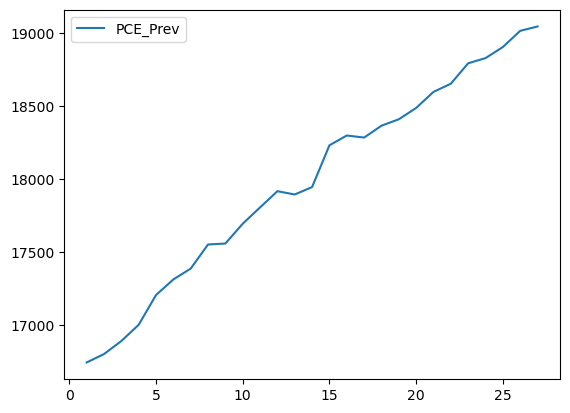

In [126]:
final_df.plot(y='PCE_Prev')

In [130]:
final_df['Prev_PCE_Prev'] = final_df['PCE_Prev'].shift(1)
final_df['change_PCE_Prev'] = final_df['PCE_Prev'] - final_df['Prev_PCE_Prev']


mod1 = smf.ols(f'change_PCE_Prev ~ final_df.index + Prev_PCE_Prev', data = final_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        change_PCE_Prev   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.195
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0596
Time:                        11:28:04   Log-Likelihood:                -142.04
No. Observations:                  26   AIC:                             290.1
Df Residuals:                      23   BIC:                             293.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6402.6765   2744.086      2.

<AxesSubplot:>

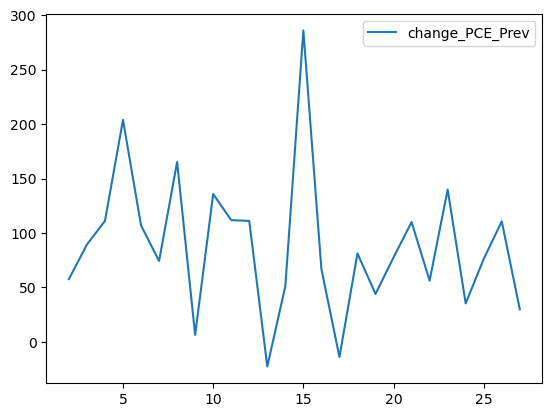

In [128]:
final_df.plot(y='change_PCE_Prev')

In [131]:
final_df['Prev_change_PCE_Prev'] = final_df['change_PCE_Prev'].shift(1)
final_df['change_change_PCE_Prev'] = final_df['change_PCE_Prev'] - final_df['Prev_change_PCE_Prev']


mod1 = smf.ols(f'change_change_PCE_Prev ~  Prev_change_PCE_Prev', data = final_df).fit() 
print(mod1.summary())

                              OLS Regression Results                              
Dep. Variable:     change_change_PCE_Prev   R-squared:                       0.579
Model:                                OLS   Adj. R-squared:                  0.560
Method:                     Least Squares   F-statistic:                     31.59
Date:                    Tue, 15 Oct 2024   Prob (F-statistic):           1.01e-05
Time:                            11:28:43   Log-Likelihood:                -139.66
No. Observations:                      25   AIC:                             283.3
Df Residuals:                          23   BIC:                             285.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

# EBay Analysis

In [142]:
variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:
    
    final_df[f'{var}_1'] = final_df[var].shift(1)
    
    final_df[f'{var}_2'] = final_df[var].shift(2)
    
    final_df[f'{var}_3'] = final_df[var].shift(3)
    
    final_df[f'{var}_4'] = final_df[var].shift(4)

In [143]:
final_df.head()

,DATE,M2REAL,CORESTICKM159SFRBATL,REAINTRATREARAT10Y,UNRATE,MEDCPIM158SFRBCLE,PCE,Avg_Sold,Total_Sold,Total_Sales,...,change_UNRATE_Prev_3,change_UNRATE_Prev_4,change_REAINTRATREARAT10Y_Prev_1,change_REAINTRATREARAT10Y_Prev_2,change_REAINTRATREARAT10Y_Prev_3,change_REAINTRATREARAT10Y_Prev_4,change_M2REAL_Prev_1,change_M2REAL_Prev_2,change_M2REAL_Prev_3,change_M2REAL_Prev_4
0,2021-11-01,7645.1,3.184384,0.163998,4.1,5.921978,16741.6,7.858333,86.0,208.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-01,7654.7,3.456458,0.091689,3.9,4.864243,16799.2,9.965000,56.0,643.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,7632.1,3.965498,0.319495,4.0,6.735986,16888.6,9.617879,107.0,846.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-01,7594.4,4.280304,0.441593,3.8,6.375188,16999.7,19.831667,95.0,617.74,...,NaN,NaN,-0.072309,NaN,NaN,NaN,9.6,NaN,NaN,NaN
4,2022-03-01,7550.5,4.534344,0.347090,3.6,6.221319,17203.6,13.934737,24.0,335.32,...,NaN,NaN,0.227806,-0.072309,NaN,NaN,-22.6,9.6,NaN,NaN


<AxesSubplot:>

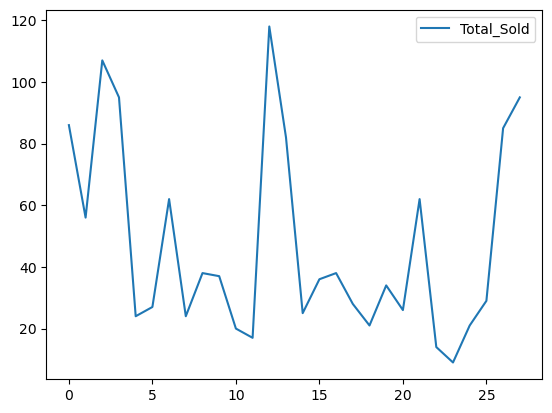

In [144]:
final_df.plot(y='Total_Sold')

In [145]:
final_df['Prev_Total_Sold'] = final_df['Total_Sold'].shift(1)
final_df['change_Total_Sold'] = final_df['Total_Sold'] - final_df['Prev_Total_Sold']


mod1 = smf.ols(f'change_Total_Sold ~ Prev_Total_Sold', data = final_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_Total_Sold   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 15 Oct 2024   Prob (F-statistic):            0.00174
Time:                        11:37:24   Log-Likelihood:                -129.35
No. Observations:                  27   AIC:                             262.7
Df Residuals:                      25   BIC:                             265.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.8594     10.479     

<AxesSubplot:>

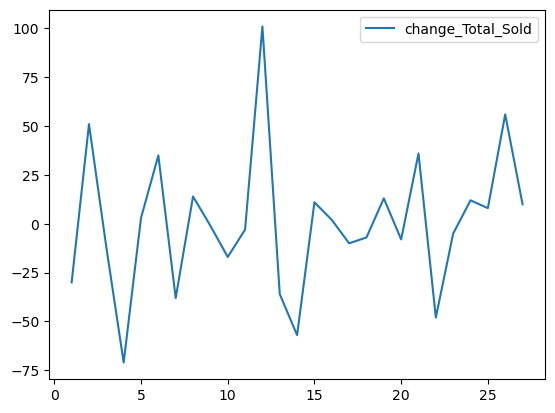

In [150]:
final_df.plot(y='change_Total_Sold')

In [146]:
final_df['Prev_change_Total_Sold'] = final_df['change_Total_Sold'].shift(1)
final_df['change_change_Total_Sold'] = final_df['change_Total_Sold'] - final_df['Prev_change_Total_Sold']


mod1 = smf.ols(f'change_change_Total_Sold ~  Prev_change_Total_Sold', data = final_df).fit() 
print(mod1.summary())

                               OLS Regression Results                               
Dep. Variable:     change_change_Total_Sold   R-squared:                       0.603
Model:                                  OLS   Adj. R-squared:                  0.586
Method:                       Least Squares   F-statistic:                     36.42
Date:                      Tue, 15 Oct 2024   Prob (F-statistic):           3.13e-06
Time:                              11:37:27   Log-Likelihood:                -129.37
No. Observations:                        26   AIC:                             262.7
Df Residuals:                            24   BIC:                             265.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [159]:
formula = 'change_PCE_Prev + change_MEDCPIM158SFRBCLE_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev + change_M2REAL_Prev'

lags = 4

variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Total_Sold ~ {formula}', data = final_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      change_Total_Sold   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                     1476.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           0.000677
Time:                        11:43:58   Log-Likelihood:                -86.005
No. Observations:                  23   AIC:                             214.0
Df Residuals:                       2   BIC:                             237.9
Df Model:                          20                                         
Covariance Type:                  HAC                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [157]:
from sklearn.metrics import mean_squared_error
formula_list = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

lags = 4

variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:

    for i in range(1, lags):

        formula_list.append(f'{var}_{i}')

# Predict the values
predictions = results.predict(final_df[formula_list])

# Calculate residuals (actual - predicted)
residuals = final_df['change_Total_Sold'] - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

RMSE: 10.17997209227567


In [158]:
10.17997209227567 / 100

0.10179972092275669

In [160]:
from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: 0.4967277577864318
Lag 3: 0.0813153891792599
Lag 4: -0.2999840754832123
Lag 5: -0.2827194893699185
Lag 6: -0.15100451277494192


In [161]:

1.96 / math.sqrt(len(final_df))

0.37040518354904267

In [162]:
final_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = final_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                 -0.426
Method:                 Least Squares   F-statistic:                    0.6713
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.751
Time:                        11:44:32   Log-Likelihood:                -122.21
No. Observations:                  23   AIC:                             286.4
Df Residuals:                       2   BIC:                             310.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [164]:
len(final_df) * 0.870

24.36

5% crit value at 20 degrees of freedom is 31 so this passes test of heteroscedaticity

In [166]:

# serial correlation present at lag 2 so eliminate it and re-run the regression
final_df['change_Total_Sold_lag_1'] = final_df['change_Total_Sold'].shift(1)

final_df['change_Total_Sold_lag_2'] = final_df['change_Total_Sold'].shift(2)

formula = 'change_PCE_Prev + change_MEDCPIM158SFRBCLE_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev + change_M2REAL_Prev'

lags = 4

variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'

mod1 = smf.ols(f'change_Total_Sold ~ {formula} + change_Total_Sold_lag_2 + change_Total_Sold_lag_1', data = final_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      change_Total_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                 4.352e+28
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                nan
Time:                        11:51:43   Log-Likelihood:                 551.57
No. Observations:                  23   AIC:                            -1057.
Df Residuals:                       0   BIC:                            -1031.
Df Model:                          22                                         
Covariance Type:                  HAC                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/evanbruno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


# Assumptions of Finite Distributed Lag Model
1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ...
3. error term is not auto correlated as the 5% crit value is 0.37 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid

## Avg Sold

In [167]:
final_df.head()

,DATE,M2REAL,CORESTICKM159SFRBATL,REAINTRATREARAT10Y,UNRATE,MEDCPIM158SFRBCLE,PCE,Avg_Sold,Total_Sold,Total_Sales,...,change_REAINTRATREARAT10Y_Prev_2,change_REAINTRATREARAT10Y_Prev_3,change_REAINTRATREARAT10Y_Prev_4,change_M2REAL_Prev_1,change_M2REAL_Prev_2,change_M2REAL_Prev_3,change_M2REAL_Prev_4,Resid,change_Total_Sold_lag_1,change_Total_Sold_lag_2
0,2021-11-01,7645.1,3.184384,0.163998,4.1,5.921978,16741.6,7.858333,86.0,208.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-01,7654.7,3.456458,0.091689,3.9,4.864243,16799.2,9.965000,56.0,643.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,7632.1,3.965498,0.319495,4.0,6.735986,16888.6,9.617879,107.0,846.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.0,NaN
3,2022-02-01,7594.4,4.280304,0.441593,3.8,6.375188,16999.7,19.831667,95.0,617.74,...,NaN,NaN,NaN,9.6,NaN,NaN,NaN,NaN,51.0,-30.0
4,2022-03-01,7550.5,4.534344,0.347090,3.6,6.221319,17203.6,13.934737,24.0,335.32,...,-0.072309,NaN,NaN,-22.6,9.6,NaN,NaN,NaN,-12.0,51.0


<AxesSubplot:>

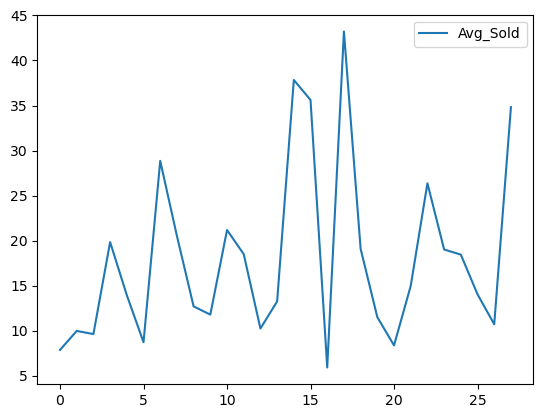

In [168]:
final_df.plot(y='Avg_Sold')

In [169]:
final_df['Prev_Avg_Sold'] = final_df['Avg_Sold'].shift(1)
final_df['change_Avg_Sold'] = final_df['Avg_Sold'] - final_df['Prev_Avg_Sold']


mod1 = smf.ols(f'change_Avg_Sold ~ Prev_Avg_Sold', data = final_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:        change_Avg_Sold   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     25.93
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.94e-05
Time:                        11:54:00   Log-Likelihood:                -99.798
No. Observations:                  27   AIC:                             203.6
Df Residuals:                      25   BIC:                             206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.4348      4.112      4.726

<AxesSubplot:>

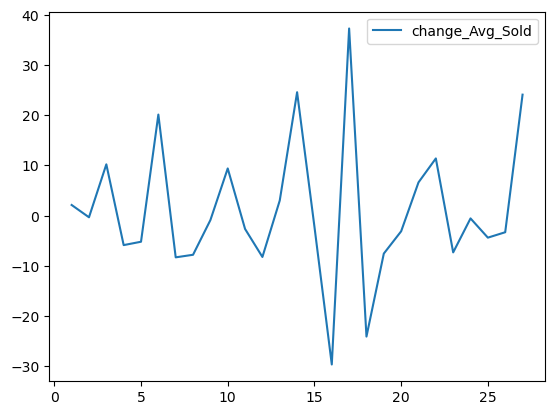

In [173]:
final_df.plot(y='change_Avg_Sold')

In [170]:
final_df['Prev_change_Avg_Sold'] = final_df['change_Avg_Sold'].shift(1)
final_df['change_change_Avg_Sold'] = final_df['change_Avg_Sold'] - final_df['Prev_change_Avg_Sold']


mod1 = smf.ols(f'change_change_Avg_Sold ~  Prev_change_Avg_Sold', data = final_df).fit() 
print(mod1.summary())

                              OLS Regression Results                              
Dep. Variable:     change_change_Avg_Sold   R-squared:                       0.694
Model:                                OLS   Adj. R-squared:                  0.681
Method:                     Least Squares   F-statistic:                     54.41
Date:                    Tue, 15 Oct 2024   Prob (F-statistic):           1.29e-07
Time:                            11:54:38   Log-Likelihood:                -103.31
No. Observations:                      26   AIC:                             210.6
Df Residuals:                          24   BIC:                             213.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [175]:
formula = 'change_PCE_Prev + change_MEDCPIM158SFRBCLE_Prev + change_UNRATE_Prev + change_REAINTRATREARAT10Y_Prev + change_M2REAL_Prev'

lags = 4

variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:

    for i in range(1, lags):

        formula = formula + f' + {var}_{i}'




mod1 = smf.ols(f'change_Avg_Sold ~ {formula}', data = final_df)
results = mod1.fit(cov_type='HAC', cov_kwds={'maxlags': 4})  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        change_Avg_Sold   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4522.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           0.000221
Time:                        11:56:01   Log-Likelihood:                -55.247
No. Observations:                  23   AIC:                             152.5
Df Residuals:                       2   BIC:                             176.3
Df Model:                          20                                         
Covariance Type:                  HAC                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [172]:
from sklearn.metrics import mean_squared_error
formula_list = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

lags = 4

variables = ['change_PCE_Prev', 'change_MEDCPIM158SFRBCLE_Prev', 'change_UNRATE_Prev', 'change_REAINTRATREARAT10Y_Prev', 'change_M2REAL_Prev']

for var in variables:

    for i in range(1, lags):

        formula_list.append(f'{var}_{i}')

# Predict the values
predictions = results.predict(final_df[formula_list])

# Calculate residuals (actual - predicted)
residuals = final_df['change_Avg_Sold'] - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

RMSE: 2.6726927861943297


In [174]:
2.6726927861943297 / 50

0.05345385572388659

In [176]:
from statsmodels.tsa.stattools import acf


# Get residuals
residuals = results.resid


# Calculate autocorrelations for the first four lags
acf_res = acf(residuals, fft=False, nlags=5)

# Print autocorrelations
print("Autocorrelations for the first four lags:")
for lag, acf_value in enumerate(acf_res):
    print(f"Lag {lag + 1}: {acf_value}")

Autocorrelations for the first four lags:
Lag 1: 1.0
Lag 2: 0.17031347831785762
Lag 3: -0.026823589617036313
Lag 4: 0.05341920174837431
Lag 5: -0.30853036315985255
Lag 6: -0.09410730036828935


In [177]:

1.96 / math.sqrt(len(final_df))

0.37040518354904267

In [178]:
final_df['Resid'] = residuals ** 2

mod1 = smf.ols(f'Resid ~ {formula}', data = final_df)
results = mod1.fit()  
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Resid   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                 -0.860
Method:                 Least Squares   F-statistic:                    0.4914
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.843
Time:                        11:56:39   Log-Likelihood:                -63.711
No. Observations:                  23   AIC:                             169.4
Df Residuals:                       2   BIC:                             193.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [179]:
len(final_df) * 0.830

23.24

# Assumptions of Finite Distributed Lag Model
1. Time series for both dependent and independent variables are stationary as testing previously
2. finite distributed lag model is written as y = alpha + B0x ...
3. error term is not auto correlated as the 5% crit value is 0.37 and the correlations do not exceed this threshold
4. test for homoskedaticity remains valid